# NLP - Classification and Sentiment Analysis of Reddit Posts

## Part 4: PyCaret Classification Models

Part 1: Web API Data Collection <br>
Part 2: Exploratory Data Analysis <br>
Part 3: Baseline Classification Models and Zero Shot Classification  <br>
Part 4: PyCaret Classification Models <br>
Part 5: Sentiment Analysis <br>

---

In part 4, automated machine learning library PyCaret will be used to scan through different classification models to find models that perform better than baseline models.

In [3]:
# !python3 -m venv /myenv
# !source /myenv/bin/activate
# !pip install --pre pycaret

In [4]:
import pandas as pd
import numpy as np
from pycaret.classification import *

## Import Cleaned Data

In [5]:
train_data = pd.read_csv('../input/project-3-train-dataset/train_data')
test_data = pd.read_csv('../input/test-data/test_data')

## Set Up PyCaret
- Specify which columns are numeric features to avoid misidentification of data types by pycaret's default labelling.
- Even though the sample was fairly balanced, still exercise the caution to activate stratified splitting to preserve the original proportions of the two categories ('Apple' and 'Google').
- Session id set at 42 to ensure reproducibility.

In [8]:
numeric_features = train_data.columns[:-1].tolist()

pycaret_model = setup(data = train_data,
                      target = 'subreddit.1',
                      numeric_features = numeric_features,
                      data_split_stratify=True,
                      session_id = 42)

,Description,Value
0,Session id,42
1,Target,subreddit.1
2,Target type,Binary
3,Original data shape,"(26998, 2001)"
4,Transformed data shape,"(26998, 2001)"
5,Transformed train set shape,"(18898, 2001)"
6,Transformed test set shape,"(8100, 2001)"
7,Numeric features,2000
8,Preprocess,True
9,Imputation type,simple


In [24]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8564,0.9356,0.8317,0.8885,0.8591,0.7130,0.7147,2.7760
et,Extra Trees Classifier,0.8564,0.9195,0.8540,0.8709,0.8623,0.7124,0.7126,57.3320
catboost,CatBoost Classifier,0.8550,0.9375,0.8000,0.9140,0.8532,0.7112,0.7175,109.8770
rf,Random Forest Classifier,0.8547,0.9294,0.8417,0.8776,0.8592,0.7093,0.7102,34.5580
svm,SVM - Linear Kernel,0.8527,0.0000,0.7991,0.9106,0.8510,0.7067,0.7129,2.0970
ridge,Ridge Classifier,0.8507,0.0000,0.8350,0.8756,0.8548,0.7013,0.7022,1.7150
lightgbm,Light Gradient Boosting Machine,0.8507,0.9336,0.7961,0.9092,0.8488,0.7027,0.7088,3.3440
xgboost,Extreme Gradient Boosting,0.8468,0.9293,0.7764,0.9203,0.8422,0.6954,0.7050,106.6560
lda,Linear Discriminant Analysis,0.8430,0.9217,0.8332,0.8638,0.8482,0.6857,0.6863,19.2590
dt,Decision Tree Classifier,0.8217,0.8296,0.8326,0.8297,0.8311,0.6424,0.6426,19.3170


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

**Result Summary**
- Logistic regression and extra trees classifier had a tie in accuracy score. Both had the highest accuracy of 0.86.
- Extra tree classifier had higher F1 score than logistic regression. This means that overall it had better precision and recall scores. Therefore, extra tree classifier was selected over logistic regression for subsequent hyperparameter tuning.

In [10]:
etc_model = create_model('et')
tuned_etc_model = tune_model(etc_model,choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8529,0.9169,0.8544,0.8648,0.8596,0.7052,0.7052
1,0.8624,0.9170,0.8604,0.8763,0.8683,0.7243,0.7245
2,0.8619,0.9270,0.8653,0.8715,0.8684,0.7231,0.7232
3,0.8624,0.9296,0.8673,0.8708,0.8691,0.7242,0.7242
4,0.8540,0.9081,0.8543,0.8665,0.8603,0.7073,0.7074
5,0.8598,0.9223,0.8543,0.8763,0.8651,0.7192,0.7194
6,0.8487,0.9164,0.8482,0.8621,0.8551,0.6968,0.6969
7,0.8651,0.9263,0.8683,0.8745,0.8714,0.7295,0.7295
8,0.8608,0.9202,0.8553,0.8773,0.8662,0.7211,0.7214


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6905,0.8986,0.9809,0.6332,0.7696,0.3591,0.4485
1,0.7005,0.9138,0.9869,0.6400,0.7765,0.3801,0.4714
2,0.6831,0.9053,0.9859,0.6264,0.7661,0.3433,0.4402
3,0.7095,0.9137,0.9920,0.6459,0.7824,0.3994,0.4917
4,0.7011,0.9066,0.9859,0.6403,0.7764,0.3818,0.4718
5,0.7005,0.9057,0.9809,0.6408,0.7752,0.3810,0.4667
6,0.7005,0.9152,0.9819,0.6407,0.7754,0.3810,0.4675
7,0.7000,0.9161,0.9869,0.6393,0.7760,0.3795,0.4709
8,0.6956,0.9075,0.9849,0.6364,0.7732,0.3700,0.4612


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Result Summary**
- The hyperparameter tuning for extra trees classifier did not produce better results. 
- This is possible since PyCaret's default hyperparameter tuning used `sklearn`'s randomized grid search, hence it may not give the optimized hyperparameters.

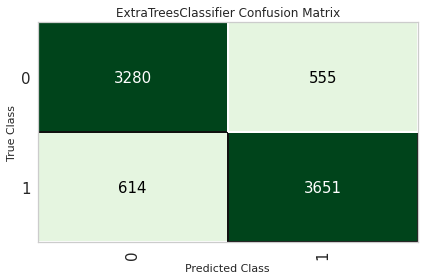

In [28]:
plot_model(tuned_etc_model,plot='confusion_matrix')

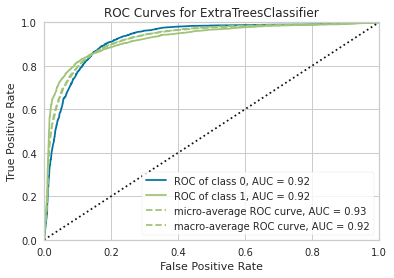

In [29]:
plot_model(tuned_etc_model,plot='auc')

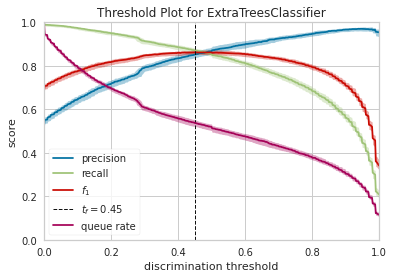

In [30]:
plot_model(tuned_etc_model,plot ='threshold')

In [11]:
predict_model(tuned_etc_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8557,0.9241,0.8560,0.8680,0.8620,0.7108,0.7108


,aasp,abil,abl,abl to,abort,absolut,acab,acc,accept,access,...,youtub,youtub channel,youtub video,zcarsal,zcarsal zcarsal,zero,zoom,subreddit.1,prediction_label,prediction_score
18898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9800
18899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5700
18900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9900
18901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9500
18902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1.0000
26994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5756
26995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6450
26996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7300


## Summary of PyCaret Classification Models

|                  Model | Accuracy |    AUC | Recall |  Prec. |     F1 |
|-----------------------:|---------:|-------:|-------:|-------:|-------:|
| Extra Trees Classifier |   0.8564 | 0.9195 | 0.8540 | 0.8709 | 0.8623 |

- PyCaret was run to find better-performing model than baseline model.
- The best performing model was found to be extra trees classifier, with an accuracy score of 0.86. Although it had the same accuracy score as logistic regression, it outpermed logistic regression in F1 score, suggesting better precision scores and recall scores overall. 
- Notably, extra trees classifier produced much better results compared to another tree based algorithm tested previously - random forest. Extra trees classifier was able to address overfitting issues much better compared to random forest, since it used random split and random subspace method to reduce variance.
- Therefore, extra trees classifier would be selected as the production model.